<a href="https://colab.research.google.com/github/tewei0328/trade-backtest/blob/main/5-ta/ta2_yfinance_top4_ta_pandas_ta_FinTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Top 4 Python libraries for technical analysis
https://github.com/erykml/medium_articles/blob/master/Quantitative%20Finance/technical_analysis_libraries.ipynb

## 用於技術分析的 4 個最佳 Python 庫
https://medium.com/geekculture/top-4-python-libraries-for-technical-analysis-db4f1ea87e09

In [1]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=4ab804cd1ade00d9fdf11ed06b9b05b3e7e946c2b7bed1e90db1dcbeb15fd089
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [2]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=d4ea93b4fb55f04fed675dc2f37a03c0ab5c9705ad516f899569cb4ad26fcaed
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [3]:
!pip install finta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#import talib
import ta
import pandas_ta as pta
from finta import TA

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]

<ipython-input-4-c65b1c15d565>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


[*********************100%***********************]  1 of 1 completed


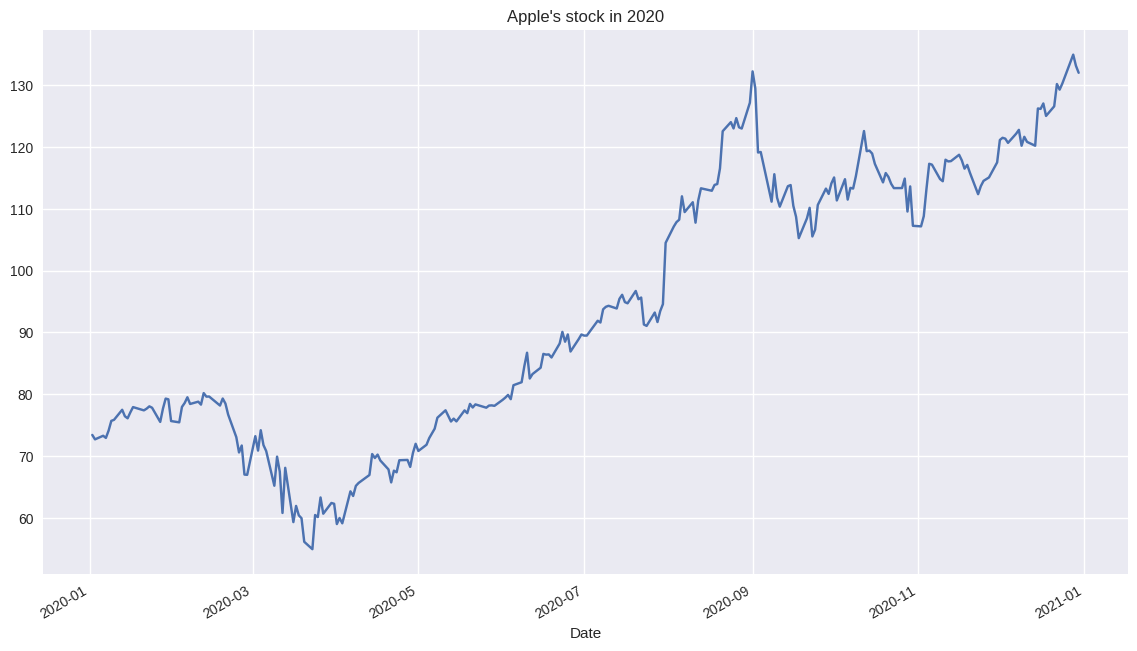

In [5]:
df = yf.download("AAPL", 
                 start="2020-01-01", 
                 end="2020-12-31")

df["Adj Close"].plot(title="Apple's stock in 2020");

# 1-TA

In [ ]:
help(ta.volatility.BollingerBands)

Help on class BollingerBands in module ta.volatility:

class BollingerBands(ta.utils.IndicatorMixin)
 |  BollingerBands(close: pandas.core.series.Series, window: int = 20, window_dev: int = 2, fillna: bool = False)
 |  
 |  Bollinger Bands
 |  
 |  https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_bands
 |  
 |  Args:
 |      close(pandas.Series): dataset 'Close' column.
 |      window(int): n period.
 |      window_dev(int): n factor standard deviation
 |      fillna(bool): if True, fill nan values.
 |  
 |  Method resolution order:
 |      BollingerBands
 |      ta.utils.IndicatorMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, close: pandas.core.series.Series, window: int = 20, window_dev: int = 2, fillna: bool = False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  bollinger_hband(self) -> pandas.core.series.Series
 |      Bollinger Channel High Band
 |      
 |      Returns:
 |          pa

In [ ]:
# instantiate the indicator
ta_bbands = ta.volatility.BollingerBands(close=df["Adj Close"], 
                                         window=20, 
                                         window_dev=2)

# copy as we will be adding to it temporarily
ta_df = df.copy()

# add Bollinger Bands
ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands.bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()

# add Bollinger Bands low/high indicator
ta_df["bb_high_ind"] = ta_bbands.bollinger_hband_indicator()
ta_df["bb_low_ind"] = ta_bbands.bollinger_lband_indicator()

# add additional measures
ta_df["bb_width"] = ta_bbands.bollinger_wband()
ta_df["bb_pct"] = ta_bbands.bollinger_pband()

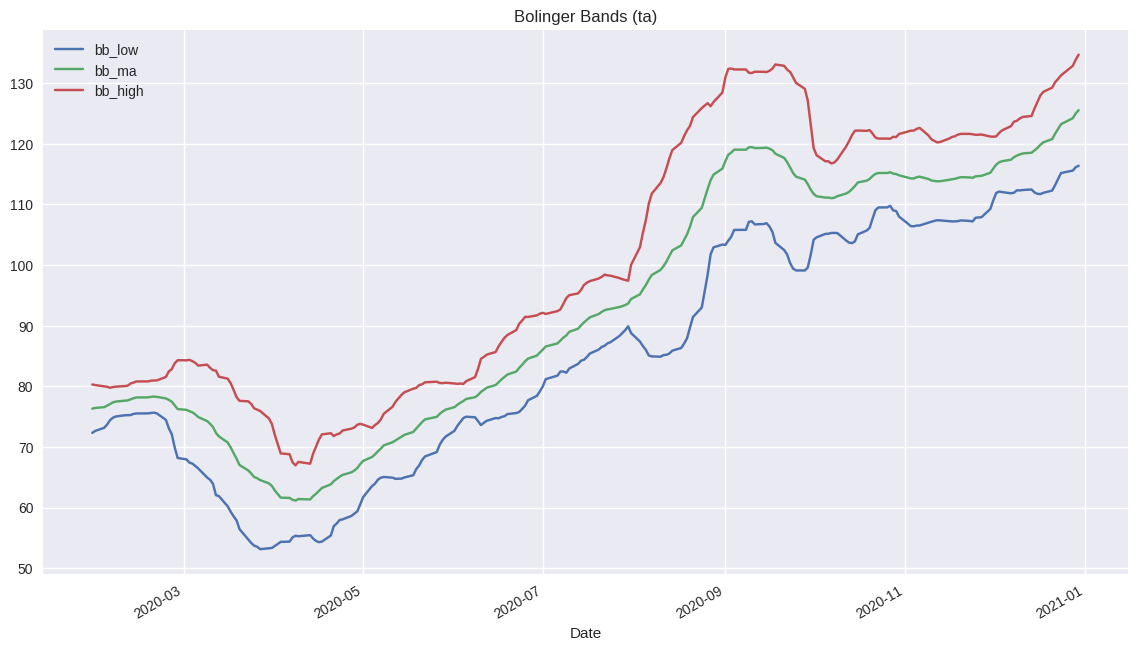

In [ ]:
ta_df[["bb_low", "bb_ma", "bb_high"]].plot(title="Bolinger Bands (ta)");

In [ ]:
ta_df

# 2-pandas_ta

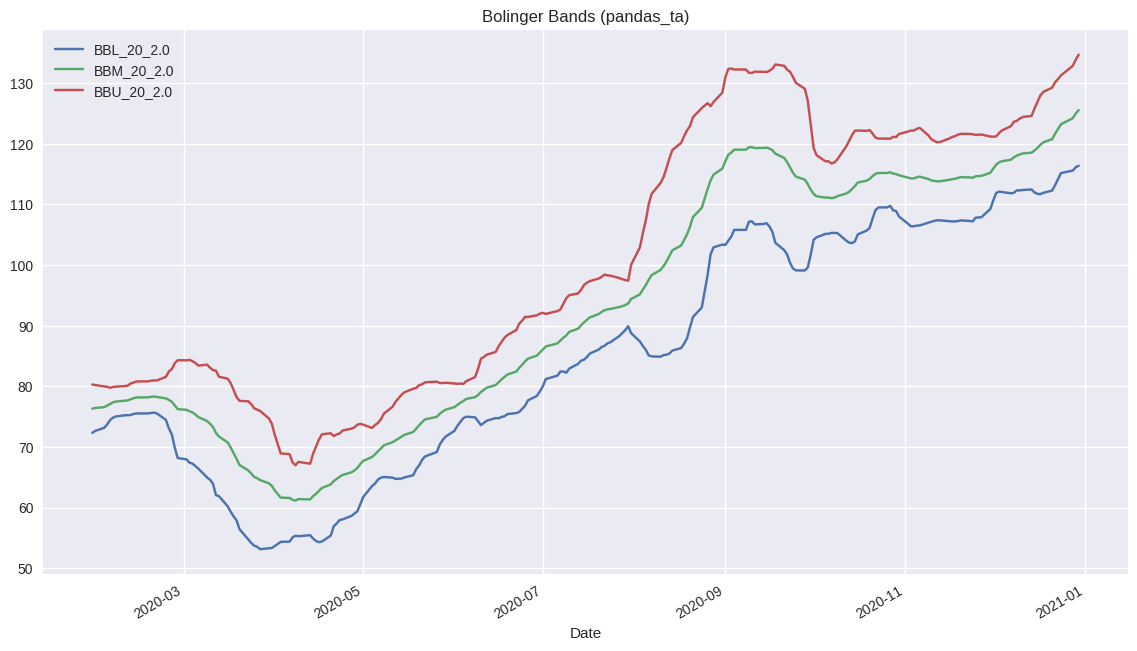

In [6]:
pta_df = pta.bbands(df["Adj Close"], length=20, talib=False)
(
    pta_df[["BBL_20_2.0", "BBM_20_2.0", "BBU_20_2.0"]]
    .plot(title="Bolinger Bands (pandas_ta)")
);

# 3-FinTA

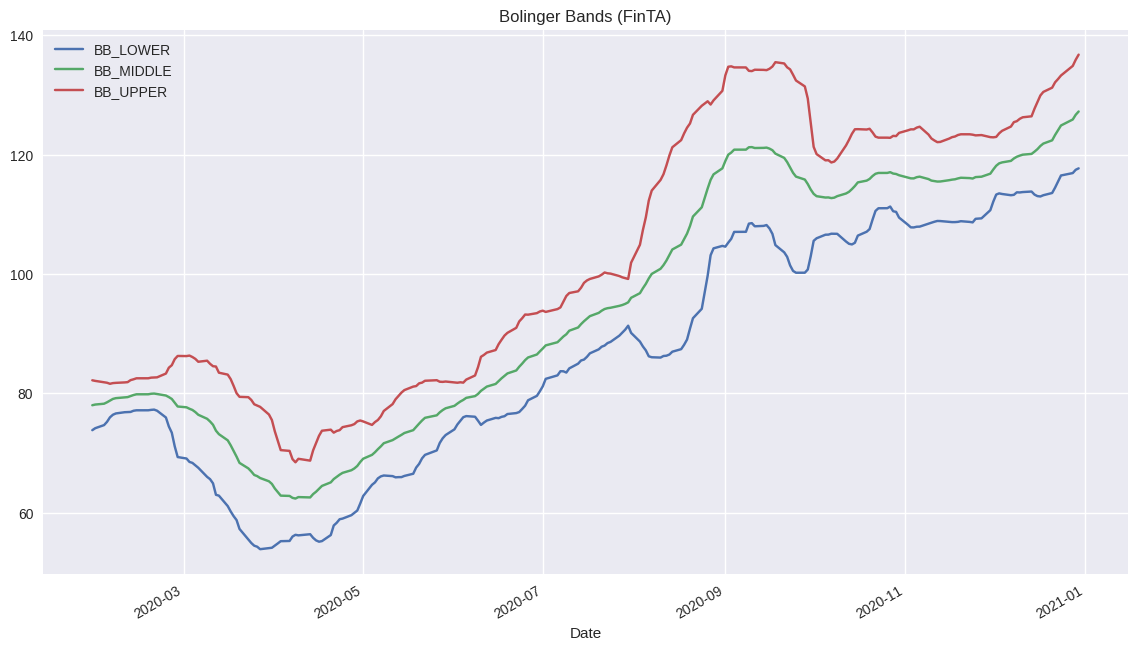

In [7]:
finta_df = TA.BBANDS(df)
(
    finta_df[["BB_LOWER", "BB_MIDDLE", "BB_UPPER"]]
    .plot(title="Bolinger Bands (FinTA)")
);